In [1]:
%matplotlib inline

# TUTORIAL - Embayment with Plankton and Mussels - Estimation of Carrying Capacity

This demo requires that you download, from Brightspace, the following files and place them in your working directory:

* model_Embayment_PlanktonMussels.py
* Download_from_ERDDAP.py
* load_forcing.py
* plot_experiment.py
* run_save_experiment.py
* Nitrate.csv
* PhyZooSDetLDet.csv
* TempSaltOxy.csv

----------------------------

First, lets lets take a look to the "forcing". The following module loads data, makes the forcing of appropiate length, and prints it. Soma variables are imported from NOAA climatologies (Temp, Salt, NO3, Oxy), some were approximated using data for Nova Scotia (Phy, Zoo, NH4, SD, LD) and some where done analytically (I). 

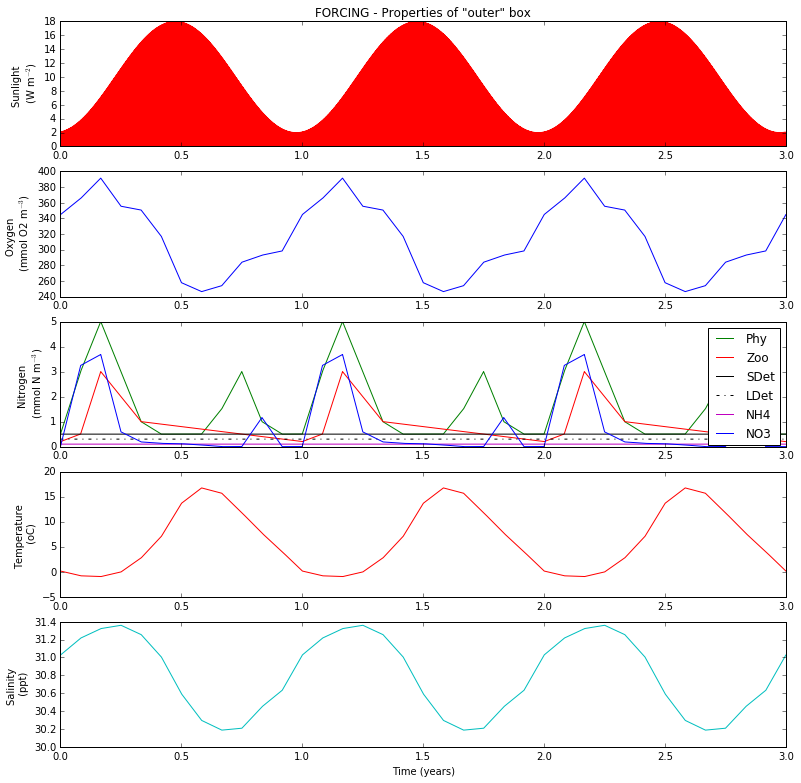

In [2]:
import model_Embayment_PlanktonMussels as model
import load_forcing

days, dt, par, InitCond = model.load_defaults()

forc = load_forcing.get_forcing(dt,days)

load_forcing.plot_forcing(dt,days,forc)

* How many years of forcing are shown above?
* Can you see the "spring blooms" and the "fall blooms"?

---------------------

Now lets use the forcing (for now just I) to run a model. To start, lets assume that the bay is closed (i.e. not coected to the open ocean) and also lets assume that there are no mussels.

The module `model_Embayment_PlanktonMussels` loads and run the model: 

Starting model run with 0.0 mussels/m3 ...
Model run: DONE!!!


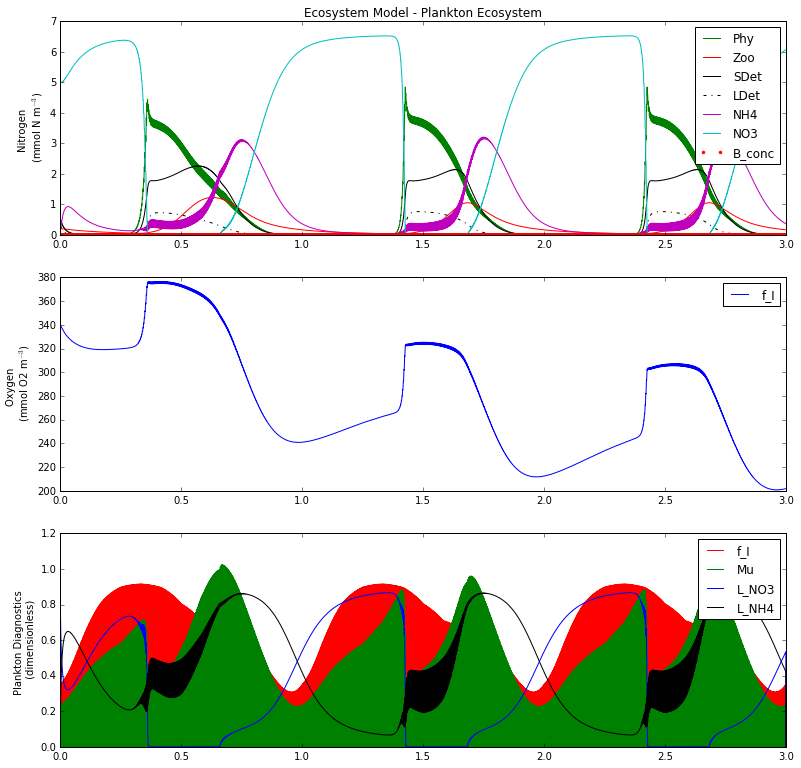

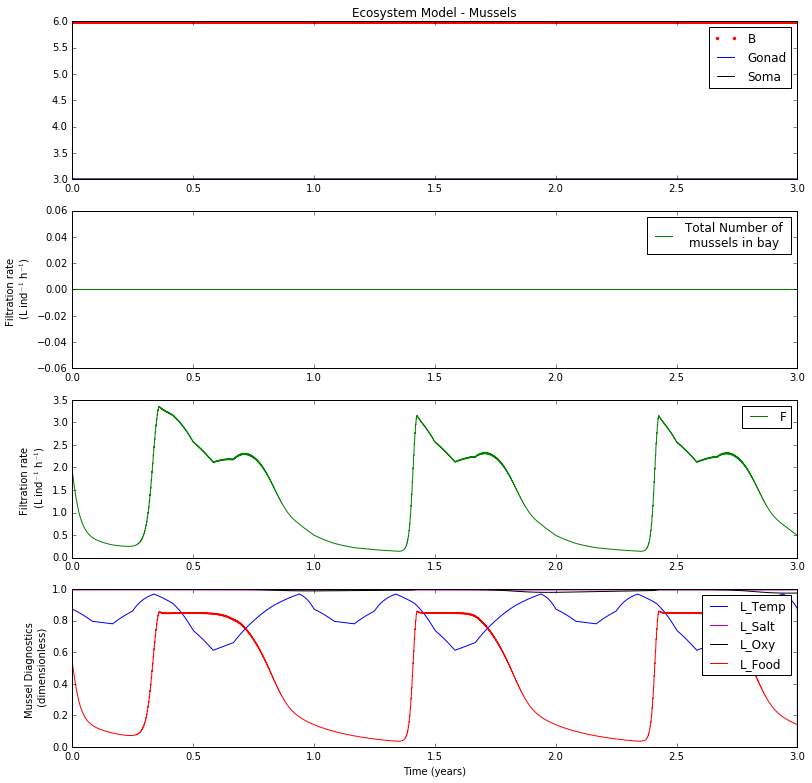

In [3]:
import model_Embayment_PlanktonMussels as model
import load_forcing

days, dt, par, InitCond = model.load_defaults()

#------ Change the default ---------------
# lets close the bay
par['chi']  = 0.0 # This is the coefficient dictating the exchange with the "open ocean" 
# and take out all mussels
InitCond['conc_muss'] = 0.
# ----------------------------------------

forc = load_forcing.get_forcing(dt,days) # Load forcing
output = model.run_model(days,dt,InitCond,par,forc) # Run model
model.plot_model(output) # Plot model

* How high are the "spring blooms"?
* Any "fall blooms"?
* Is the calculated "mu" (phytoplankton growth rate) similar to "real" growth rates? (hint: an "average" rate is about 1 d^-1)

We are not growing mussels at the moment, but the model still calculates how fast mussels would filter and grow, if there wuold be some. So is the filtration rate ok? (hint: about 3 L ind^-1 h^-1 is ok).

-------------------------------------

Lets check the total nitrogen. Note that this only works if the "open boundary" is CLOSED!

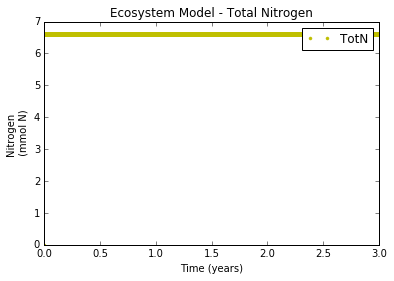

In [4]:
model.plot_totalNitrogen(output)

* Is Nitrogen concerved?

------------

#### Adding Mussels...

Lets do another run, but this time with mussels (however, still with a closed bay):

Starting model run with 1.0 mussels/m3 ...
Model run: DONE!!!


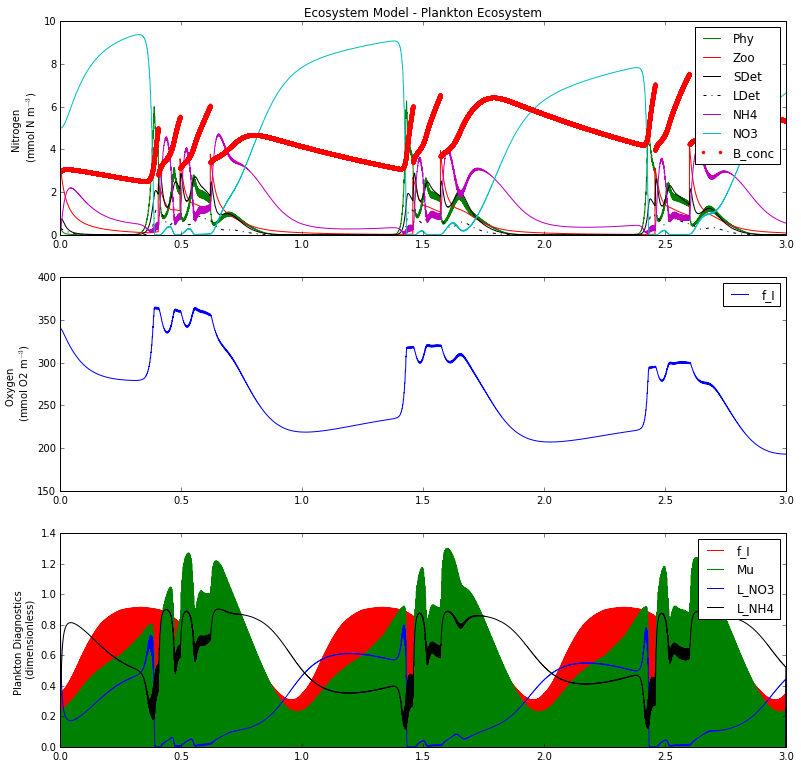

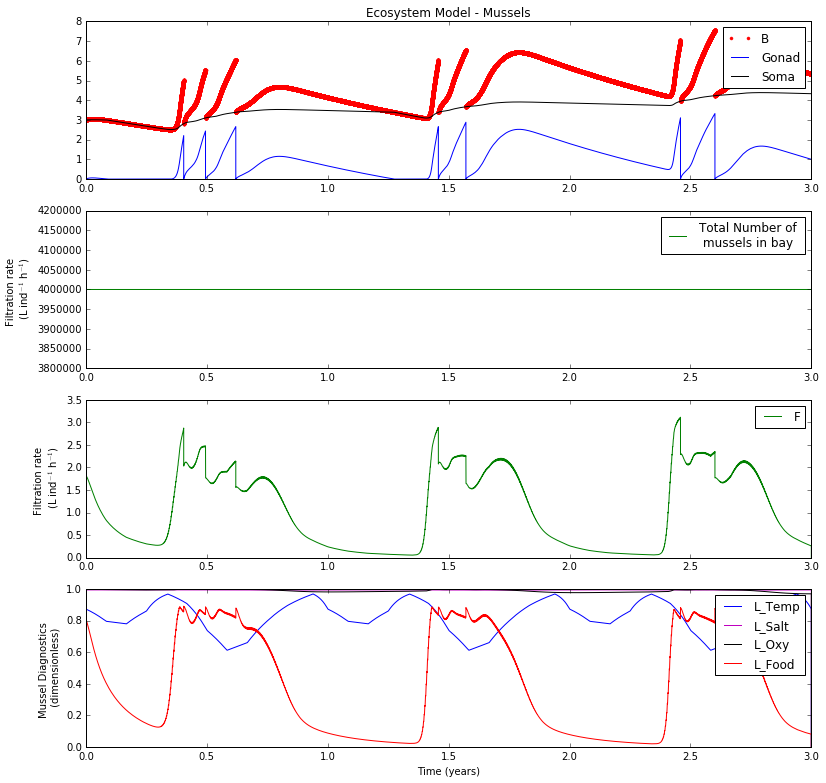

In [5]:
days, dt, par, InitCond = model.load_defaults()

#------ Change the default ---------------
# lets close the bay
par['chi']  = 0.0 # This is the coefficient dictating the exchange with the "open ocean" 
# Lets add 1 mussel/m3
InitCond['conc_muss'] = 1.
# ----------------------------------------

forc = load_forcing.get_forcing(dt,days) # Load forcing
output = model.run_model(days,dt,InitCond,par,forc) # Run model
model.plot_model(output) # Plot model

* How high are the "spring blooms"?
* Any "fall blooms"?
* How are Phytoplankton "mu" and mussel "Filtration rate" (i.e. low, high, ok)?
* How many spawnings per year?

---------------------

lets check total nitrogen:

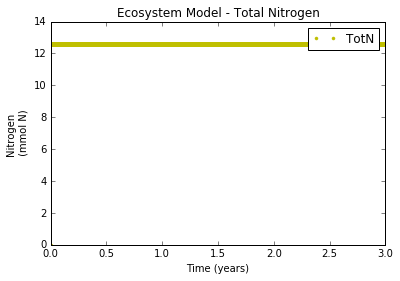

In [6]:
model.plot_totalNitrogen(output)

* Is nitrogen concerved?

-----------------

#### Open the bay to the "open ocean"

Now lets open the "embayment" to the "open ocean"...

Starting model run with 1.0 mussels/m3 ...
Model run: DONE!!!


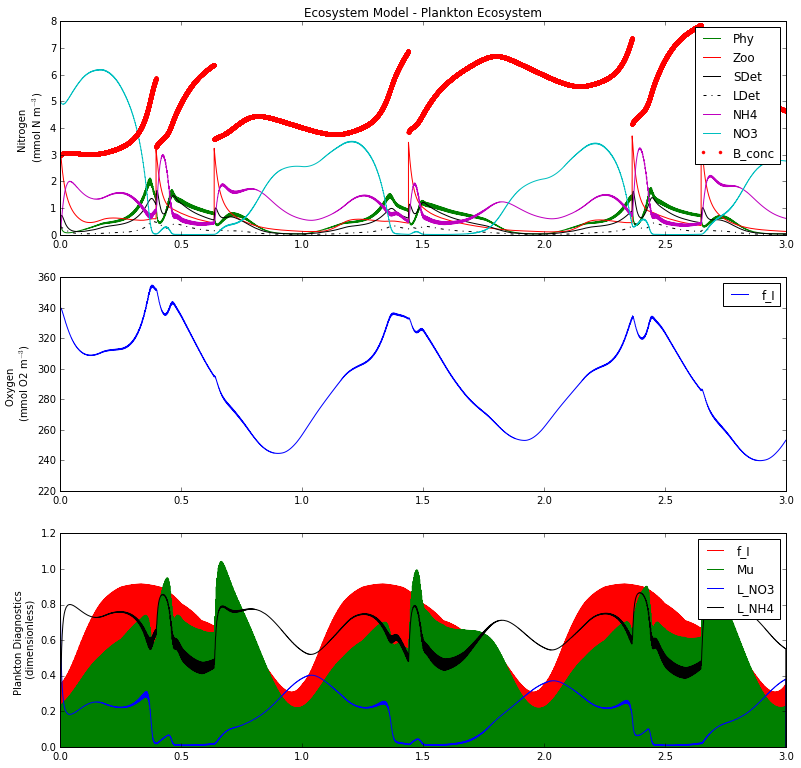

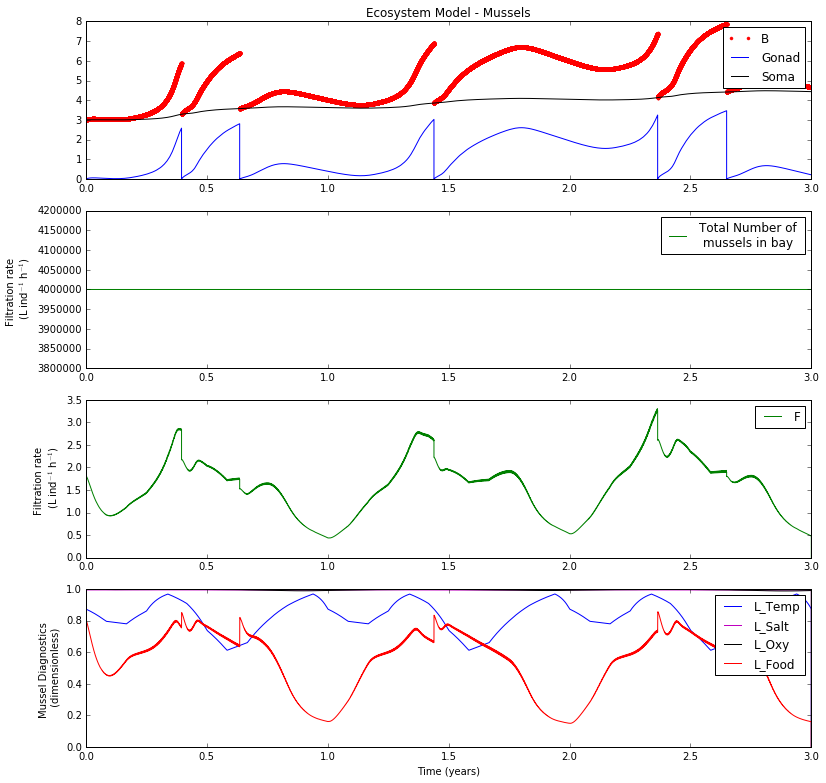

In [7]:
days, dt, par, InitCond = model.load_defaults()

#------ Change the default ---------------
# lets OPEN the bay
par['chi']  = 0.01 # This is the coefficient dictating the exchange with the "open ocean" 
InitCond['conc_muss'] = 1.
# ----------------------------------------

forc = load_forcing.get_forcing(dt,days) # Load forcing
output = model.run_model(days,dt,InitCond,par,forc) # Run model
model.plot_model(output) # Plot model

Same checks...

* How high are the "spring blooms"?
* Any "fall blooms"?
* How are Phytoplankton "mu" and mussel "Filtration rate" (i.e. low, high, ok)?
* How many spawnings per year?

---------------------

Once again... lets check total nitrogen:

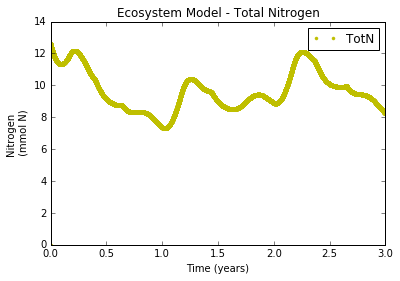

In [8]:
model.plot_totalNitrogen(output)

See how `Total_Nitrogen` is no longer preserved... this is because nitrogen now is now imported (or exported) through the open boundary.

------------------------

## Experiment 1 (Closed Bay)

Here is how we run MANY model runs, in sequence, to assess the properties of the ecosystem and the effects of aquaculture. We'll run 7 runs with increasing amounts of mussels (from 0 to 20 mussels/m3).

This should take about 3 minutes...

In [9]:
import model_Embayment_PlanktonMussels as model
import load_forcing
import pickle

days, dt, par, InitCond = model.load_defaults()
forc = load_forcing.get_forcing(dt,days)

par['chi']  = 0.0 # exchange coefficient (with the "open ocean")

MussConc_levels = [0,1,2,5,10,15,20]

output = {}
for level in MussConc_levels:
    InitCond['conc_muss'] = float(level)
    output[str(level)] = model.run_model(days,dt,InitCond,par,forc)
    
pickle.dump( output, open( 'Exp1_output.p', 'wb' ) )

print 'Experiment is DONE! and saved in: model_output.p'

Starting model run with 0.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 1.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 2.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 5.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 10.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 15.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 20.0 mussels/m3 ...
Model run: DONE!!!
Experiment is DONE! and saved in: model_output.p


DONE!!! Now lets plot the output. Note that output is now a "dictionary" containing 7 "dictionaries" (one for each run).

The code below runs a "for loop" so that you quickly populate your graph.

Note the "trick" to make the line colors of varing color from "blue" to "red".

C:\Users\cerc-user\Anaconda2\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Printing...


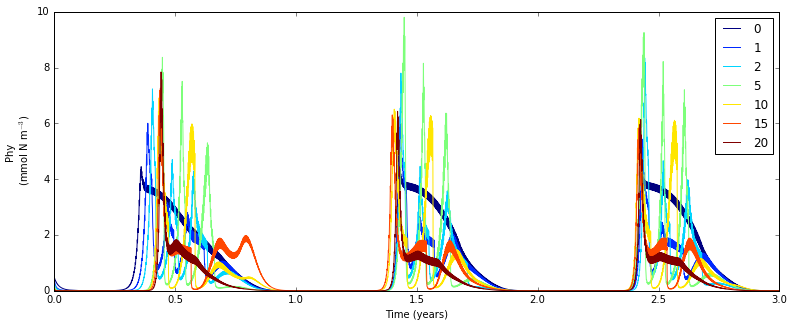

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax) = plt.subplots(1,1,figsize=(13,5))
ax.set_ylabel('Phy \n (mmol N m$^{-3}$)')
ax.set_xlabel('Time (years)')
ax.set_color_cycle([plt.cm.jet(i) for i in np.linspace(0, 1, len(output))])

levels = sorted([float(i) for i in output.keys()])

legendKeys = []  
for floatLevel in levels:
    level = str(int(floatLevel))
    legendKeys.append(level)
    ax.plot(output[level]['time']/365,output[level]['Phy'],'-')

print "Printing..."
ax.legend(legendKeys)
plt.show()

To save some time, I made some plotting fucntions (module: plot_experiment)... so you can easily make plots. Later should should take a minute and look inside plot_experiment.py so you see how the plots work. For now, just load the module, and have fun plotting... below is an example to plot "Oxy":

Printing...


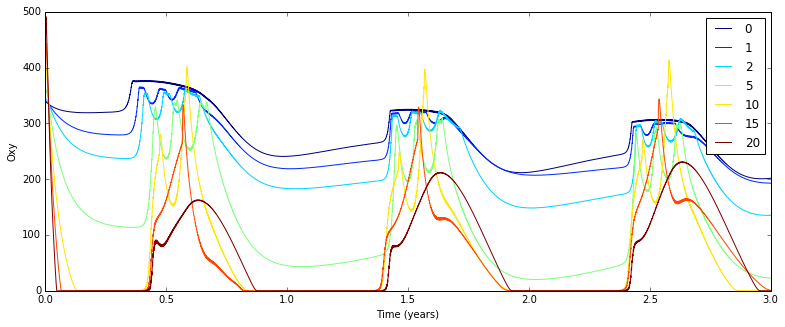

In [11]:
import plot_experiment as pexp

pexp.plot_one_variable(output,var='Oxy')

* Any hypoxia or anoxia?

----------------

In the plot_experiment module, there is a function to plot the whole ecosystem: 

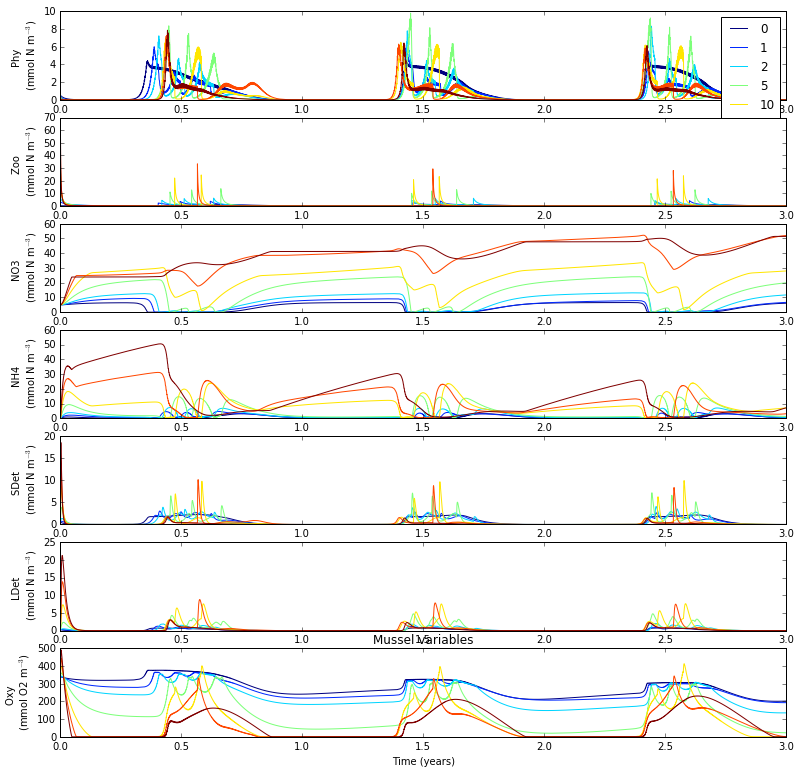

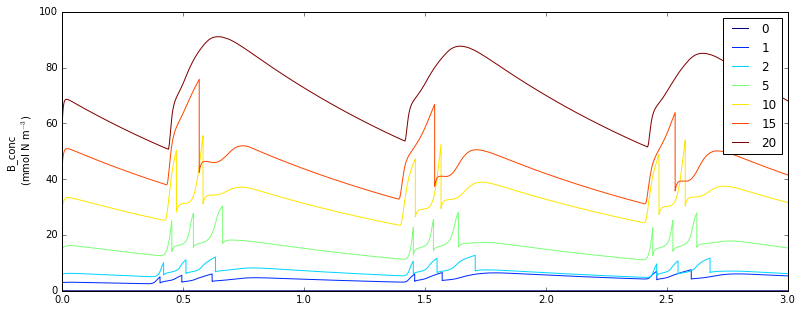

In [12]:
pexp.plot_ecosystem(output)

As you can see... there is lot of information here. To better interpret the results we have to do some analyses.

First, lets plot Mussel productivity vs Mussel Density...

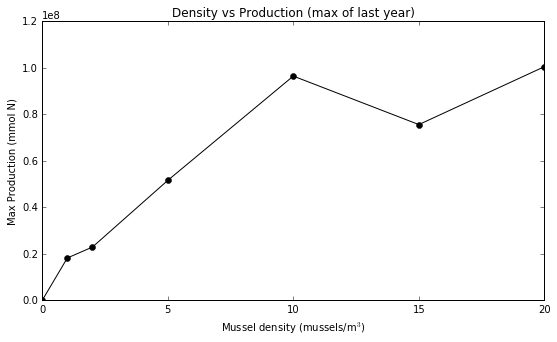

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

SeedDensity, Production = [], []
for level in output:
    SeedDensity.append(float(level))
    Production.append((max(output[level]['B'][-int(365/0.01):])-output[level]['B'][0])*output[level]['n_muss'][0])


df = pd.DataFrame({'SeedDensity' : SeedDensity, 'Production' : Production})
df = df.sort_values(by='SeedDensity')

fig, (ax) = plt.subplots(1,1,figsize=(9,5))
ax.plot(df['SeedDensity'], df['Production'],'ko-')
ax.set_xlabel('Mussel density (mussels/m$^{3}$)')
ax.set_ylabel('Max Production (mmol N)')
ax.set_title('Density vs Production (max of last year)')
plt.show()

Above you can see that the more mussels you add at the beginning, the more you produce at the end... up to about 5 mussels/m3. Then you actually get less production. The maximum of this curve is the **Production Carrying Capacity**. However, we should also need to estimate the **Environmental Carrying Capacity**. Below is the impact of mussel density on Oxygen.

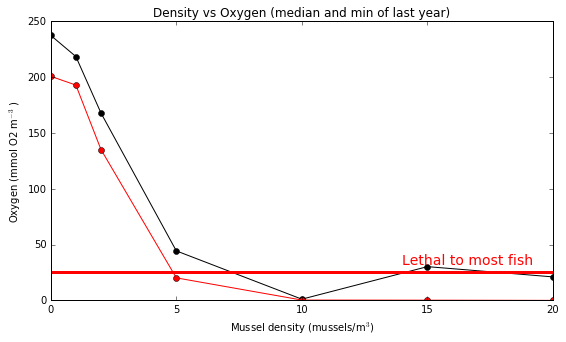

In [14]:
# Quick way to do the graph
pexp.plot_densityVSoxygen(output)

As you can see... 5 mussels/m3 would result in killings of many fish (VERY BAD!!!)

What about ammonia?

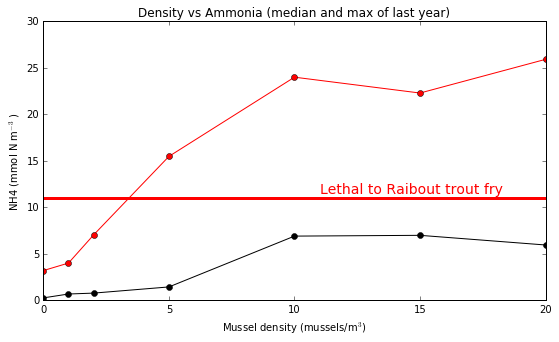

In [15]:
pexp.plot_densityVSammonia(output)

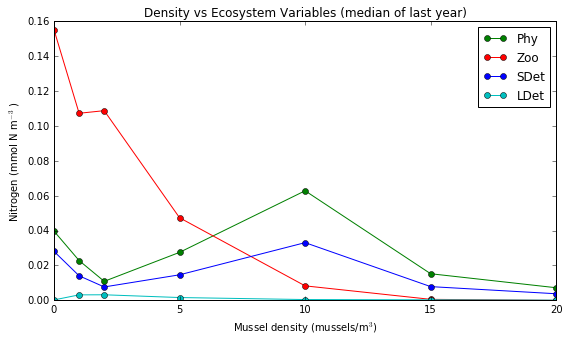

In [16]:
pexp.plot_densityVSecosystem(output)

### Experiment 2 (Open exchange with open ocean)

Starting model run with 0.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 1.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 2.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 5.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 10.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 15.0 mussels/m3 ...
Model run: DONE!!!
Starting model run with 20.0 mussels/m3 ...
Model run: DONE!!!
Experiment is DONE! and saved in: Exp2_output.p


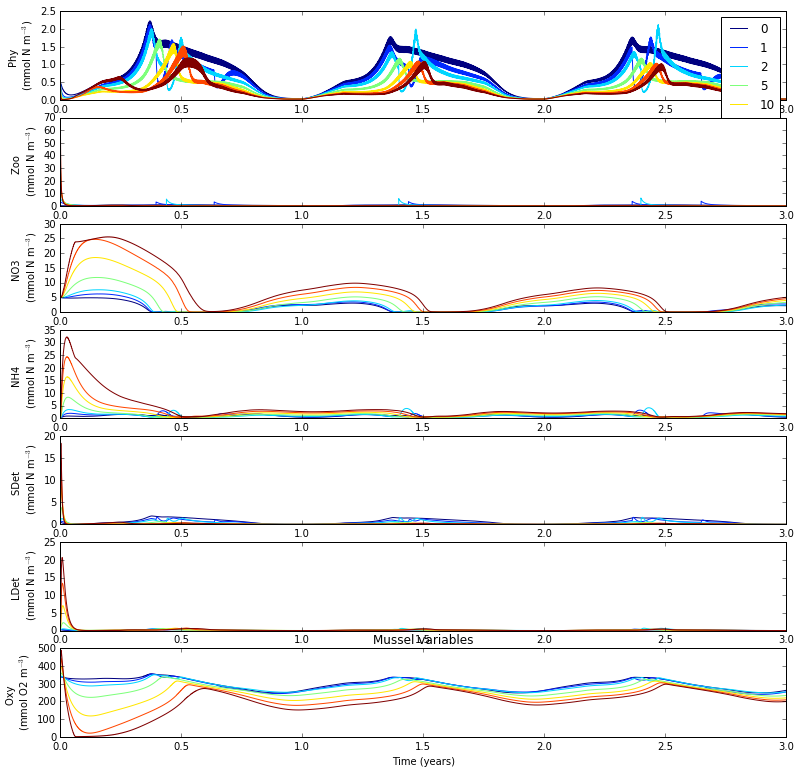

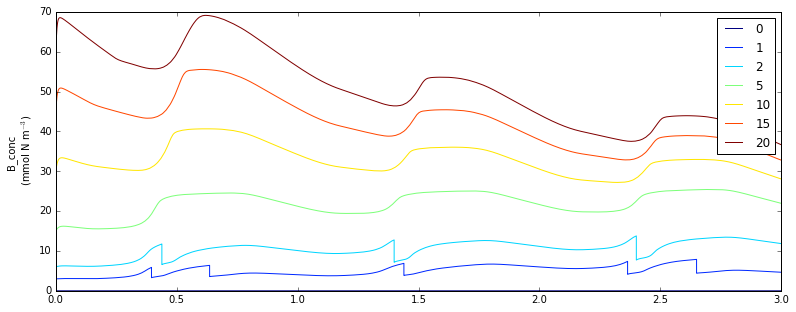

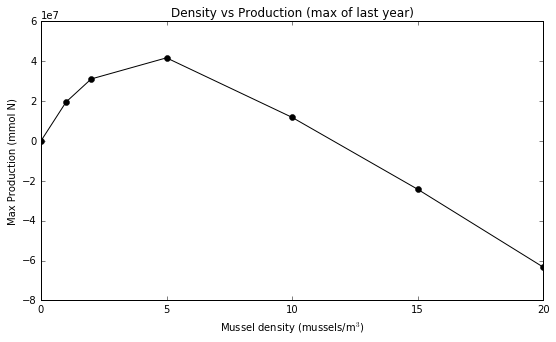

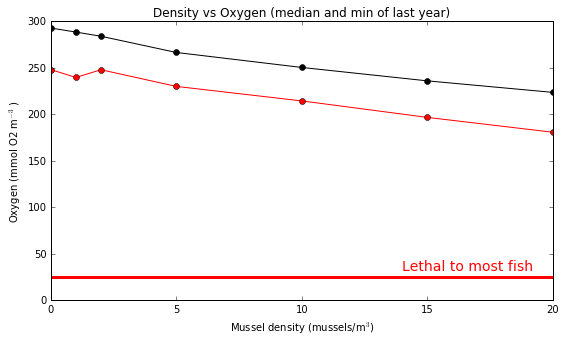

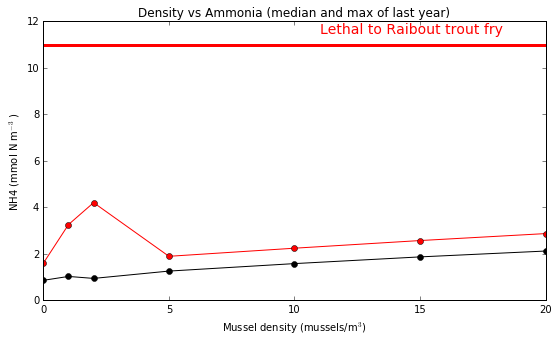

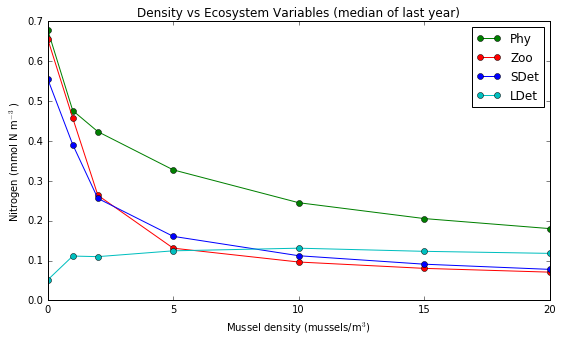

In [17]:
import model_Embayment_PlanktonMussels as model
import plot_experiment as pexp
import load_forcing
import pickle


days, dt, par, InitCond = model.load_defaults()
forc = load_forcing.get_forcing(dt,days)

# Exchange
par['chi']  = 0.01

MussConc_levels = [0,1,2,5,10,15,20]

output = {}
for level in MussConc_levels:
    InitCond['conc_muss'] = float(level)
    output[str(level)] = model.run_model(days,dt,InitCond,par,forc)
    
pickle.dump( output, open( 'Exp2_output.p', 'wb' ) )

print 'Experiment is DONE! and saved in: Exp2_output.p'

pexp.plot_all(output)

If you want... you can run another experiment set with mussels that "do not spawn":

* par['Bpub']  = 100

and another with an embayment with higher exchange with the "open ocean"

* par['chi']  = 0.1

Can you think of other experiments?